<font style='color: green; font-size: 30px; font-weight: bold'>Emotion Rating</font>

<br>
<font style='color:red; font-size:30px'>1.2 About Dataset</font>
<hr style='border:1px solid red'>

## Description

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Project for define the emotion of a text.</p>

### Data:

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Text</b> - Texto minerado do twitter</li>
    <li><b>Geo Coordinates.latitude</b> - Latitude usuário</li>
    <li><b>Geo Coordinates.longitude</b> - Longitude usuário</li>
    <li><b>User Location</b> - Local do usuário</li>
    <li><b>Username</b> - Nome do usuário</li>
    <li><b>User Screen Name</b> - Nome do usuário no twitter</li>
    <li><b>Retweet Count</b> - Retuidado</li>
    <li><b>Classificacao</b> - Classificação do sentimento</li>
    <li><b>Observação</b> - Observação sobre o twitter</li>   
</ul>

Fonte: [Kaggle](https://www.kaggle.com/datasets/leandrodoze/tweets-from-mgbr)

<br>
<font style='color:red; font-size:30px'>1.3 Importing libraries and reading data</font>
<hr style='border: 1px solid red'>

> For install some librare, active the code below

In [1]:
# !pip install pandas, numpy
# !pip install matplotlib, seaborn, plotly
# !pip install re, nltk

In [2]:
# Manipulation
import pandas as pd 
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Settings 
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('seaborn-darkgrid')

import re # regex
import nltk # NLP

In [3]:
data = pd.read_csv('data/Tweets_Mg.csv')
print(data.shape)
data.head()

(8199, 26)


Unnamed: 0                      Created At  \
0           0  Sun Jan 08 01:22:05 +0000 2017   
1           1  Sun Jan 08 01:49:01 +0000 2017   
2           2  Sun Jan 08 01:01:46 +0000 2017   
3           3  Wed Jan 04 21:43:51 +0000 2017   
4           4  Mon Jan 09 15:08:21 +0000 2017   

                                                Text  \
0  ���⛪ @ Catedral de Santo Antônio - Governador ...   
1  � @ Governador Valadares, Minas Gerais https:/...   
2  �� @ Governador Valadares, Minas Gerais https:...   
3                        ��� https://t.co/BnDsO34qK0   
4  ��� PSOL vai questionar aumento de vereadores ...   

   Geo Coordinates.latitude  Geo Coordinates.longitude User Location  \
0                       NaN                        NaN        Brasil   
1                  -41.9333                     -18.85           NaN   
2                  -41.9333                     -18.85           NaN   
3                       NaN                        NaN           NaN   
4                       NaN                        NaN           NaN   

               Username User Screen Name  Retweet Count Classificacao  \
0  Leonardo C Schneider    LeoCSchneider              0        Neutro   
1               Wândell         klefnews              0        Neutro   
2               Wândell         klefnews              0        Neutro   
3         Ana estudando  estudandoconcur              0        Neutro   
4                 Emily         Milly777              0      Negativo   

  Observação  Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  Unnamed: 14  \
0        NaN          NaN          NaN          NaN          NaN          NaN   
1        NaN          NaN          NaN          NaN          NaN          NaN   
2        NaN          NaN          NaN          NaN          NaN          NaN   
3        NaN          NaN          NaN          NaN          NaN          NaN   
4        NaN          NaN          NaN          NaN          NaN          NaN   

   Unnamed: 15  Unnamed: 16  Unnamed: 17  Unnamed: 18  Unnamed: 19  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

   Unnamed: 20  Unnamed: 21  Unnamed: 22  Unnamed: 23  Unnamed: 24  
0          NaN          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN          NaN

<br>
<font style='color:red; font-size:30px'>1.4 Manipulations</font>
<hr style='border: 1px solid red'>

<br>
<font color= 'blue' style='font-size: 20px'>1.4.2 Missing values</font>

In [4]:
data.isnull().sum()

Unnamed: 0                      0
Created At                      0
Text                            0
Geo Coordinates.latitude     8095
Geo Coordinates.longitude    8095
User Location                2710
Username                        0
User Screen Name                0
Retweet Count                   0
Classificacao                   0
Observação                   8198
Unnamed: 10                  8199
Unnamed: 11                  8199
Unnamed: 12                  8199
Unnamed: 13                  8199
Unnamed: 14                  8199
Unnamed: 15                  8199
Unnamed: 16                  8199
Unnamed: 17                  8199
Unnamed: 18                  8199
Unnamed: 19                  8199
Unnamed: 20                  8199
Unnamed: 21                  8199
Unnamed: 22                  8199
Unnamed: 23                  8199
Unnamed: 24                  8199
dtype: int64

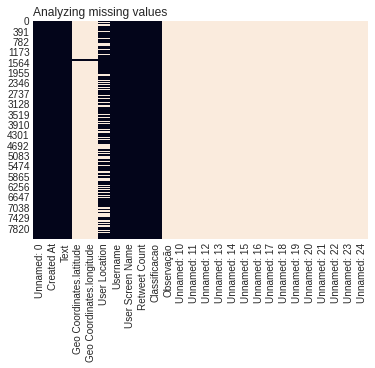

In [5]:
nulls = data.isnull()

plt.title('Analyzing missing values', loc = 'left')
sns.heatmap(nulls, cbar = False);

> A parte clara do heatmap são os campos nulos!!

### Dropping columns

In [6]:
data.columns

Index(['Unnamed: 0', 'Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao', 'Observação',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [7]:
extract_columns = data.columns[10:]
data.drop(columns = extract_columns, inplace = True)

print(f'Shape: {data.shape}')
data.columns

Shape: (8199, 10)


Index(['Unnamed: 0', 'Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao'],
      dtype='object')

### Fields uniques

In [8]:
data.nunique()

Unnamed: 0                   8199
Created At                   7945
Text                         5765
Geo Coordinates.latitude       57
Geo Coordinates.longitude      57
User Location                1591
Username                     3907
User Screen Name             3966
Retweet Count                 113
Classificacao                   3
dtype: int64

In [9]:
# Deleting column: 'Unnamed: 0'
data.drop(columns=['Unnamed: 0'], inplace=True)

<br>
<font color= 'blue' style='font-size: 20px'>1.4.3 Adjusting date</font>

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Created At                 8199 non-null   object 
 1   Text                       8199 non-null   object 
 2   Geo Coordinates.latitude   104 non-null    float64
 3   Geo Coordinates.longitude  104 non-null    float64
 4   User Location              5489 non-null   object 
 5   Username                   8199 non-null   object 
 6   User Screen Name           8199 non-null   object 
 7   Retweet Count              8199 non-null   int64  
 8   Classificacao              8199 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 576.6+ KB


In [11]:
from dateutil.parser import parse

date_test = data['Created At'][0]

print(f'Before: {date_test}')
print(f'Later: {parse(date_test).date()}')

Before: Sun Jan 08 01:22:05 +0000 2017
Later: 2017-01-08


In [12]:
## adjusting date like: 2000-01-01
def adjust_date(date):
    """
    Convert date
    """
    date_text = date
    transformation = parse(date_text)
    formatted_date = transformation.date()
    
    return formatted_date

In [13]:
data['Formatted Date'] = data['Created At'].apply(adjust_date)

### Creating year, month and day

In [14]:
# Transforming column in datetime

data['Formatted Date'] = pd.to_datetime(data['Formatted Date'])

In [15]:
# Extracting
data['Year'] = data['Formatted Date'].dt.year
data['Month'] = data['Formatted Date'].dt.month
data['Day'] = data['Formatted Date'].dt.day

#### Analyzing

In [16]:
data.groupby(by = ['Year', 'Month']).agg(
    count_of = ('Username', 'count')
)

count_of
Year Month          
2016 12            3
2017 1          7073
     2          1123

<br>
<font color= 'blue' style='font-size: 20px'>1.4.4 Adjusting Geo-Localization</font>

In [17]:
geo_analyse = data.loc[
    (data['Geo Coordinates.latitude'].notnull()) & 
    (data['Geo Coordinates.longitude'].notnull())
]
geo_analyse.shape

(104, 13)

In [18]:
# Grouping geo-localizations

localization_analyse = geo_analyse.groupby(
    by = ['Geo Coordinates.latitude', 'Geo Coordinates.longitude']
).count()[['Username']].reset_index()

localization_analyse.columns = ['Lat', 'Lon', 'Count of']
localization_analyse.head()

Lat        Lon  Count of
0 -46.643035 -22.270759         2
1 -46.627106 -23.493237         2
2 -46.616726 -21.131515         1
3 -45.523750 -22.330291         1
4 -45.236850 -19.331757         1

### Plot

In [19]:
px.density_mapbox(
    # Data
    localization_analyse,
    # Lat
    lat='Lat',
    # Lon
    lon='Lon',
    # Count of 
    z='Count of',
    # Style
    mapbox_style='stamen-terrain',
    # Country
    center=dict(lat=-23.700, lon=-46.555),
    # Zoom
    zoom=3,
    # Circle
    radius = 30
)

> The information about geo-localization seems inconsistent

### Analyzing 'User Location'

In [20]:
!pip install geopy

In [21]:
from geopy.geocoders import Nominatim

nominatim_function = Nominatim(user_agent='GetLoc')

In [22]:
print(f'Localization: {nominatim_function.geocode("Brasil").address}')
print(f'Latitude: {nominatim_function.geocode("Brasil").latitude}')
print(f'Longitude: {nominatim_function.geocode("Brasil").longitude}')

Localization: Brasil
Latitude: -10.3333333
Longitude: -53.2


In [23]:
# Creating representativeness analysis
local_analyse = data['User Location'].value_counts(normalize = True).cumsum().reset_index()

# Filtering only 50%
local_analyse = local_analyse.loc[local_analyse['User Location'] < 0.5]

# Rename columns
local_analyse.columns = ['Local', '%']

# Verify
print(local_analyse.shape)
local_analyse.head()

(39, 2)


Local         %
0                         Brasil  0.107670
1                   Minas Gerais  0.172163
2  Belo Horizonte - Minas Gerais  0.214793
3         Belo Horizonte, Brasil  0.256149
4                 Belo Horizonte  0.280015

In [24]:
# Calculing count of 
count_of = data['User Location'].value_counts().reset_index()

count_of.columns = ['Local', 'Count of']
count_of

Local  Count of
0                            Brasil       591
1                      Minas Gerais       354
2     Belo Horizonte - Minas Gerais       234
3            Belo Horizonte, Brasil       227
4                    Belo Horizonte       131
...                             ...       ...
1586                      SABARÁ-MG         1
1587                      SABARÁ MG         1
1588         João Monlevade, Brasil         1
1589                       zimbabwe         1
1590     Brasil - Angola - Portugal         1

[1591 rows x 2 columns]

In [25]:
# Cross

localization_tab = pd.merge(local_analyse, count_of, on = 'Local', how = 'inner')
localization_tab.head()

Local         %  Count of
0                         Brasil  0.107670       591
1                   Minas Gerais  0.172163       354
2  Belo Horizonte - Minas Gerais  0.214793       234
3         Belo Horizonte, Brasil  0.256149       227
4                 Belo Horizonte  0.280015       131

In [26]:
# Including the heo-localization with GEOPY

localization_tab['Latitude'] = None
localization_tab['Longitude'] = None

# loop 
for loop in range(0, len(localization_tab)):
    try:
        local = nominatim_function.geocode(localization_tab['Local'][loop])
    except:
        pass
    
    if local != None:
        localization_tab['Latitude'][loop] = local.latitude
        localization_tab['Longitude'][loop] = local.longitude    

In [27]:
localization_tab.head()

Local         %  Count of   Latitude  Longitude
0                         Brasil  0.107670       591 -10.333333      -53.2
1                   Minas Gerais  0.172163       354 -18.526484 -44.158865
2  Belo Horizonte - Minas Gerais  0.214793       234 -19.922732 -43.945095
3         Belo Horizonte, Brasil  0.256149       227 -19.922732 -43.945095
4                 Belo Horizonte  0.280015       131 -19.922732 -43.945095

### Plot

In [28]:
px.density_mapbox(
    # Data
    localization_tab,
    # Lat
    lat='Latitude',
    # Lon
    lon='Longitude',
    # Count of 
    z='Count of',
    # Style
    mapbox_style='stamen-terrain',
    # Country
    center=dict(lat=-23.700, lon=-46.555),
    # Zoom
    zoom=3,
    # Circle
    radius = 30
)

<br>
<font style='color:red; font-size:30px'>1.5 Text mining</font>
<hr style='border: 1px solid red'>

In [29]:
classification_labels = list(data['Classificacao'].unique())
classification_labels

['Neutro', 'Negativo', 'Positivo']

<br>
<font color= 'blue' style='font-size: 20px'>1.5.2 Class Balance</font>

In [30]:
# !pip install yellowbrick

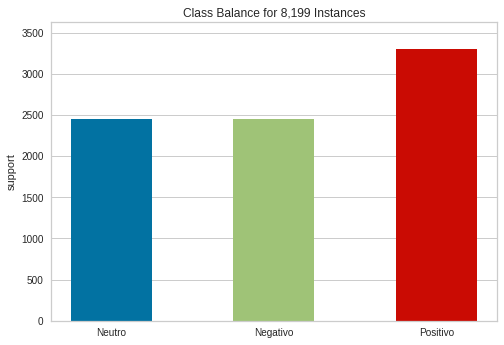

In [31]:
from yellowbrick import ClassBalance

balance_graphic = ClassBalance(labels = classification_labels)
balance_graphic.fit(data['Classificacao'])
balance_graphic.show();

In [32]:
# Plot for evaluate

anl_values = data['Classificacao'].value_counts()

# plotly
balance_graphic2 = go.Figure(
    go.Funnelarea(
        text=anl_values.index,
        values=anl_values.values,
        title={'text': 'Distribuição dos Sentimentos', 'position': 'top center'}
    )
)

balance_graphic2.show();

<br>
<font color= 'blue' style='font-size: 20px'>1.5.3 Count of Words</font>

In [33]:
def count_of_words(text):
    count_of = len(text.split())
    return count_of

In [34]:
data['Count_of_words'] = data['Text'].apply(count_of_words)
data.head()

Created At  \
0  Sun Jan 08 01:22:05 +0000 2017   
1  Sun Jan 08 01:49:01 +0000 2017   
2  Sun Jan 08 01:01:46 +0000 2017   
3  Wed Jan 04 21:43:51 +0000 2017   
4  Mon Jan 09 15:08:21 +0000 2017   

                                                Text  \
0  ���⛪ @ Catedral de Santo Antônio - Governador ...   
1  � @ Governador Valadares, Minas Gerais https:/...   
2  �� @ Governador Valadares, Minas Gerais https:...   
3                        ��� https://t.co/BnDsO34qK0   
4  ��� PSOL vai questionar aumento de vereadores ...   

   Geo Coordinates.latitude  Geo Coordinates.longitude User Location  \
0                       NaN                        NaN        Brasil   
1                  -41.9333                     -18.85           NaN   
2                  -41.9333                     -18.85           NaN   
3                       NaN                        NaN           NaN   
4                       NaN                        NaN           NaN   

               Username User Screen Name  Retweet Count Classificacao  \
0  Leonardo C Schneider    LeoCSchneider              0        Neutro   
1               Wândell         klefnews              0        Neutro   
2               Wândell         klefnews              0        Neutro   
3         Ana estudando  estudandoconcur              0        Neutro   
4                 Emily         Milly777              0      Negativo   

  Formatted Date  Year  Month  Day  Count_of_words  
0     2017-01-08  2017      1    8              10  
1     2017-01-08  2017      1    8               7  
2     2017-01-08  2017      1    8               7  
3     2017-01-04  2017      1    4               2  
4     2017-01-09  2017      1    9              20

In [35]:
data['Count_of_words'].describe()

count    8199.000000
mean       16.141115
std         4.280192
min         1.000000
25%        13.000000
50%        15.000000
75%        19.000000
max        32.000000
Name: Count_of_words, dtype: float64

In [36]:
px.box(data, x = 'Classificacao', y = 'Count_of_words', color = 'Classificacao', title='Count of words per Feeling')

<br>
<font color= 'blue' style='font-size: 20px'>1.5.4 Word Cloud</font>

In [37]:
#!pip install wordcloud

In [38]:
from wordcloud import WordCloud

# Create
concat = ''

for text in data['Text']:
    for word in text.split():
        concat += ' ' + word
        
print(f'Count of words grouped: {len(concat)}')

Count of words grouped: 961415


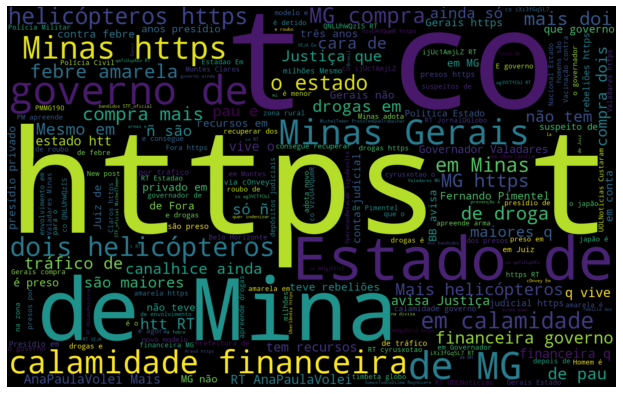

In [39]:
# Plot

# instancing WordCloud
wordcloud = WordCloud(width=1600, height=1000).generate(concat)

fig, ax = plt.subplots(figsize = (15, 7))
ax.imshow(wordcloud, interpolation = 'bilinear')
ax.set_axis_off()

<br>
<font color= 'blue' style='font-size: 20px'>1.5.5 Word Cloud for each feeling</font>

In [40]:
# Adjusting text

positive_words = ''
negative_words = ''
neutral_words  = ''

for feeling in data['Classificacao'].unique():
    
    feeling_filter = data.loc[data['Classificacao'] == feeling]
    
    if feeling == 'Positivo':     
        # loop for concat - positive
        for text in feeling_filter['Text']:
            for word in text.split():
                positive_words += ' ' + word
    
    elif feeling == 'Negativo':
        # loop for concat - negative
        for text in feeling_filter['Text']:
            for word in text.split():
                negative_words += ' ' + word
    
    else:
        # loop for concat - neutral
        for text in feeling_filter['Text']:
            for word in text.split():
                neutral_words += ' ' + word
                
print(f"""
    Count of words:
    Positive: {len(positive_words)}
    Negative: {len(negative_words)}
    Neutral:  {len(neutral_words)}"""
)


    Count of words:
    Positive: 374456
    Negative: 307576
    Neutral:  279383


## Positive words

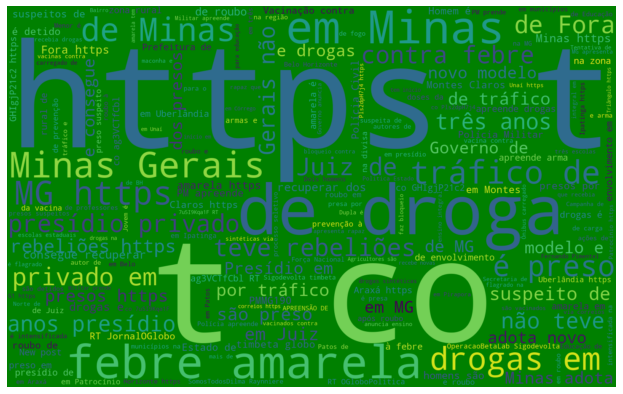

In [41]:
wordcloud = WordCloud(width=1600, height=1000, background_color='green').generate(positive_words)

fig, ax = plt.subplots(figsize = (15, 7))
ax.imshow(wordcloud, interpolation = 'bilinear')
ax.set_axis_off()

## Negative words

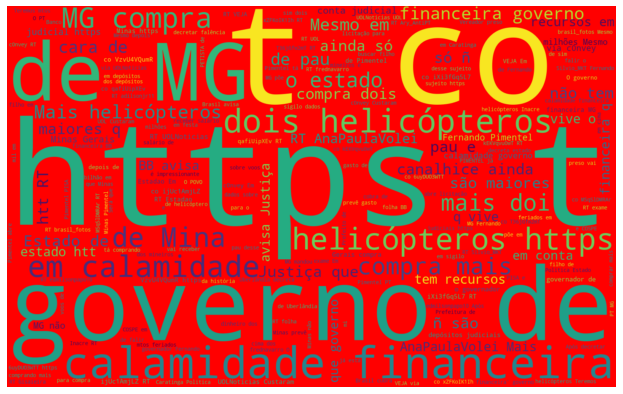

In [42]:
wordcloud = WordCloud(width=1600, height=1000, background_color='red').generate(negative_words)

fig, ax = plt.subplots(figsize = (15, 7))
ax.imshow(wordcloud, interpolation = 'bilinear')
ax.set_axis_off()

## Neutral words

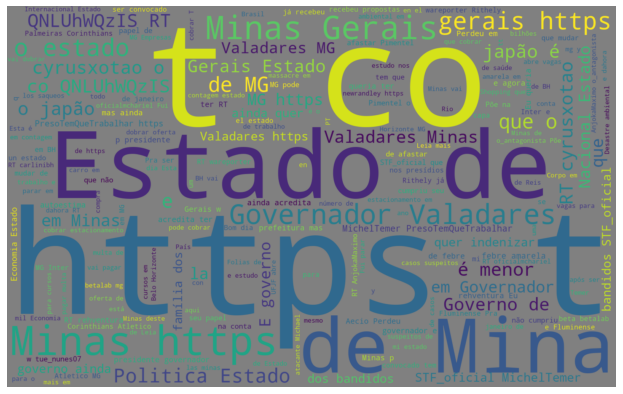

In [43]:
wordcloud = WordCloud(width=1600, height=1000, background_color='gray').generate(neutral_words)

fig, ax = plt.subplots(figsize = (15, 7))
ax.imshow(wordcloud, interpolation = 'bilinear')
ax.set_axis_off()

<br>
<font color= 'blue' style='font-size: 20px'>1.5.6 Ranking</font>

In [44]:
from collections import Counter

phrases = data['Text'].apply( lambda text: str(text).split() )

word_rank = Counter( [word for phrase in phrases for word in phrase] ) 

# Table
countof_tab = pd.DataFrame(word_rank.most_common(20))

# Rename columns
countof_tab.columns = ['Word', 'Count of']

countof_tab

Word  Count of
0             de      8352
1             em      4003
2             RT      3080
3          Minas      2626
4              e      2079
5              -      1937
6             MG      1849
7              a      1707
8              o      1419
9             do      1415
10        Estado      1282
11       governo      1218
12             é      1214
13           que      1194
14        Gerais       920
15        compra       884
16    calamidade       871
17        drogas       835
18          mais       820
19  helicópteros       801

In [45]:
# Plot

fig = px.bar(
    countof_tab, 
    x = 'Count of',
    y = 'Word', 
    color = 'Word',
    orientation='h',
    width=700,
    height=700
)
fig.show();

<br>
<font color= 'blue' style='font-size: 20px'>1.5.6 Duplicates texts</font>

In [46]:
print(f'Shape before: {data.shape}')

data.drop_duplicates(['Text'], inplace = True)

print(f'Shape after: {data.shape}')

Shape before: (8199, 14)
Shape after: (5765, 14)


<br>
<font style='color:red; font-size:30px'>1.6 Data processing</font>
<hr style='border: 1px solid red'>

<br>
<font color= 'blue' style='font-size: 20px'>1.6.2 Data Cleaning</font>

In [47]:
remove_emoji = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)


In [48]:
def data_cleaning(text):
    '''
    Cleaning links, tiny, character and emojis
    '''
    # Remove links
    layer_01 = re.sub('http\S+', '', text)
    
    # Convert for tiny
    layer_02 = layer_01.lower()
    
    # Remove special character
    layer_03 = re.sub('["("")"?@|$|.|!,:%;"]', '', layer_02)
    
    # Remove emojis
    layer_04 = remove_emoji.sub('', layer_03)
    
    # Remove hashtag
    layer_05 = re.sub('#\S+', '', layer_04)
    
    # Remove numerics
    layer_06 = re.sub('[0-9]', '', layer_05)
    
    return layer_06

In [49]:
model_data = data[['Text', 'Classificacao']]

In [50]:
model_data['Text'] = model_data['Text'].apply(data_cleaning)

model_data.head()

Text Classificacao
0    catedral de santo antônio - governador valad...        Neutro
1                 governador valadares minas gerais         Neutro
2                 governador valadares minas gerais         Neutro
3                                                           Neutro
4   psol vai questionar aumento de vereadores e p...      Negativo

<br>
<font color= 'blue' style='font-size: 20px'>1.6.3 Stop Words </font>

In [51]:
words_group = nltk.corpus.stopwords.words('portuguese')
len(words_group)

207

In [52]:
def remove_stop_words(text):
    '''
        remove all stop words in the text 
    '''
    words_list = text.split()
    
    adjust_phrase = ''
    
    for loop in words_list:
        # Valide if is sotpword
        if loop not in words_group:
            adjust_phrase += ' ' + loop
    
    return adjust_phrase

In [53]:
model_data['Text'] = model_data['Text'].apply(remove_stop_words)

model_data.head()

Text Classificacao
0   catedral santo antônio - governador valadares/mg        Neutro
1                  governador valadares minas gerais        Neutro
2                  governador valadares minas gerais        Neutro
3                                                           Neutro
4   psol vai questionar aumento vereadores prefei...      Negativo

<br>
<font color= 'blue' style='font-size: 20px'>1.6.4 Extracting "Radical"</font>

In [54]:
radical = nltk.stem.RSLPStemmer()

In [55]:
def extract_radical(text):
    '''
        extract all radical words
    '''
        
    words_list = text.split()
    adjust_phrase = ''
    
    for loop in words_list:
        
        extraction = radical.stem(loop)
        adjust_phrase += ' ' + extraction    
    
    return adjust_phrase

In [56]:
model_data['Text'] = model_data['Text'].apply(extract_radical)

model_data.head()

Text Classificacao
0           catedr sant antôni - govern valadares/mg        Neutro
1                             govern valad min geral        Neutro
2                             govern valad min geral        Neutro
3                                                           Neutro
4   psol vai quest aument vere prefeit bh justiç ...      Negativo

<br>
<font style='color:red; font-size:30px'>1.7 Building Model</font>
<hr style='border: 1px solid red'>

<br>
<font color= 'blue' style='font-size: 20px'>1.7.2 Train and Test Division</font>

In [59]:
from sklearn.model_selection import train_test_split

X = model_data['Text']
y = model_data['Classificacao']


# Divide train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(f'Count of train data: {X_train.shape[0]}')
print(f'Count of test data: {X_test.shape[0]}')

Count of train data: 4612
Count of test data: 1153


<br>
<font color= 'blue' style='font-size: 20px'>1.7.3 Tokenize and Vetorizer</font>

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import TweetTokenizer

token = TweetTokenizer()
vetorizer = CountVectorizer(analyzer='word', tokenizer=token.tokenize)

word_frequency = vetorizer.fit_transform(X_train)

print(type(word_frequency))

<class 'scipy.sparse.csr.csr_matrix'>


<br>
<font color= 'blue' style='font-size: 20px'>1.7.4 Model</font>

In [62]:
from sklearn.naive_bayes import MultinomialNB

model_nb = MultinomialNB()
model_nb.fit(word_frequency, y_train)

MultinomialNB()

<br>
<font color= 'blue' style='font-size: 20px'>1.7.5 Evaluation</font>

In [66]:
vetor_x_test = vetorizer.transform(X_test)

prediction = model_nb.predict(vetor_x_test)

prediction

array(['Positivo', 'Positivo', 'Neutro', ..., 'Positivo', 'Positivo',
       'Negativo'], dtype='<U8')

## Confusion Matrix

In [67]:
from sklearn.metrics import confusion_matrix

confusion_matrix_evaluate = confusion_matrix(y_test, prediction)
confusion_matrix_evaluate

array([[150,  20,   1],
       [ 24, 364,  23],
       [  3,  24, 544]])

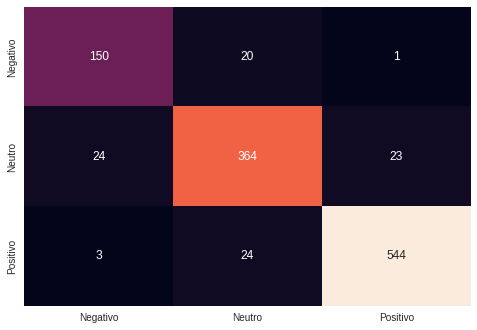

In [71]:
classes = ['Negativo', 'Neutro', 'Positivo']

sns.heatmap(
    confusion_matrix_evaluate, 
    annot=True,
    cbar = False,
    fmt = 'd',
    xticklabels=classes,
    yticklabels=classes
);

## Classification Report

In [73]:
from sklearn.metrics import classification_report

classification_report_evaluate = classification_report(y_test, prediction)
print(classification_report_evaluate)

              precision    recall  f1-score   support

    Negativo       0.85      0.88      0.86       171
      Neutro       0.89      0.89      0.89       411
    Positivo       0.96      0.95      0.96       571

    accuracy                           0.92      1153
   macro avg       0.90      0.91      0.90      1153
weighted avg       0.92      0.92      0.92      1153



<br>
<font color= 'blue' style='font-size: 20px'>1.7.5 Testing Model</font>

In [75]:
def consolidate_functions( text ):
    '''
        Calls every functions for return prediction
    '''
    cleaning = data_cleaning(text)
    stop = remove_stop_words(text)
    rad = extract_radical(text)
    vet = vetorizer.transform([rad])
    
    prediction = model_nb.predict(vet)
    
    return prediction

In [83]:
tweet_writing  = input('O que está pensando? ')

print(f'The feeling of the phrase is: {consolidate_functions(tweet_writing)[0]}')

O que está pensando? Politica é uma merda
The feeling of the phrase is: Negativo


<br>
<font color= 'blue' style='font-size: 20px'>1.7.6 Upgrading model</font>

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


models = [
    LogisticRegression(),
    RandomForestClassifier(n_estimators=300, max_depth=12),
    MultinomialNB(),
    SVC(),    
]

models_name = ['Regressão Logistica', 'Random Forest', 'Naive Bayes', 'Machine Vector']

In [85]:
# Loop for training every models 

accuracy_result = []

for model in models:
    
    # Fitting
    model.fit(word_frequency, y_train)
    
    # Transforming
    test_vector = vetorizer.transform(X_test)
    
    # Predicting
    prediction = model.predict(test_vector)
    
    # Result
    result = accuracy_score(y_test, prediction)
    
    # Salving
    accuracy_result.append(result)

In [90]:
final_result = {
    'Name': models_name,
    'Accuracy': accuracy_result
}

pd.DataFrame(final_result).sort_values('Accuracy', ascending = False)

Name  Accuracy
3       Machine Vector  0.946227
0  Regressão Logistica  0.942758
2          Naive Bayes  0.917606
1        Random Forest  0.891587